# Question 3

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

### Reading Image

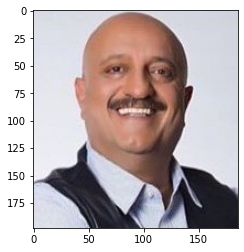

In [2]:
img = iio.imread('bigMasoud.jpg')
plt.imshow(img)
plt.show()

### Enhancing Image

In [14]:
def create_from_rgb(r, g, b):
    img = np.zeros((r.shape[0], r.shape[1], 3))
    img[:,:,0] = r
    img[:,:,1] = g
    img[:,:,2] = b
    return np.array(img, dtype='uint8')

def convert_to_rgb(img):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    return (r, g, b)

def enhance(img, gamma1 , gamma2, t):
    r, g, b = convert_to_rgb(img)
    
    c1 = 255 / np.max(r**gamma1)
    c2 = 255 / np.max(r**gamma2)
    for i in range(r.shape[0]):
        for j in range(r.shape[1]):
            if (r[i,j]<t[0] and g[i,j]<t[1] and b[i,j]<t[2]):
                r[i,j] = c1*(r[i,j]**gamma1)
            else:
                r[i,j] = c2*(r[i,j]**gamma2)
    
    c1 = 255 / np.max(g**gamma1)
    c2 = 255 / np.max(g**gamma2)
    for i in range(g.shape[0]):
        for j in range(g.shape[1]):
            if (r[i,j]<t[0] and g[i,j]<t[1] and b[i,j]<t[2]):
                g[i,j] = c1*(g[i,j]**gamma1)
            else:
                g[i,j] = c2*(g[i,j]**gamma2)
    
    c1 = 255 / np.max(b**gamma1)
    c2 = 255 / np.max(b**gamma2)
    for i in range(b.shape[0]):
        for j in range(b.shape[1]):
            if (r[i,j]<t[0] and g[i,j]<t[1] and b[i,j]<t[2]):
                b[i,j] = c1*(b[i,j]**gamma1)
            else:
                b[i,j] = c2*(b[i,j]**gamma2)
    
    return create_from_rgb(r, g, b)

img = iio.imread('bigMasoud.jpg')
images = [img]
new_img = enhance(img, 1.05, 0.95, (255, 255, 255))
n = 30 # number of output images
for i in range(n):
    images.append(new_img)
    iio.imwrite('{}.png'.format(i), new_img)
    new_img = enhance(new_img, 1.05, 0.95, (180, 180, 180))
iio.mimsave('Traumatized_bigMasoud.gif', images, duration=0.08)


### Histogram

<Figure size 720x480 with 0 Axes>

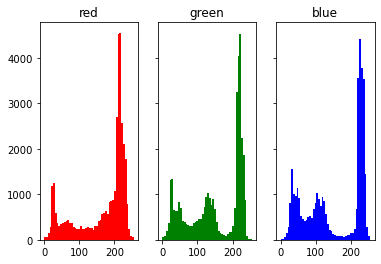

<Figure size 720x480 with 0 Axes>

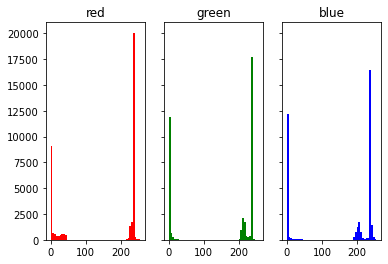

In [15]:
img1 = images[0]
img2 = images[n-1]

# a function for draw histogram of an images
def image_hist(img):
    r, g, b = convert_to_rgb(img)
    fig, axs = plt.subplots(1, 3, sharey=True)
    axs[0].hist(x=r.flatten(), color='red', bins=50)
    axs[0].set_title('red')
    axs[1].hist(x=g.flatten(), color='green', bins=50)
    axs[1].set_title('green')
    axs[2].hist(x=b.flatten(), color='blue', bins=50)
    axs[2].set_title('blue')

plt.figure(dpi=120)
image_hist(img1)
plt.savefig('Histogram_Img1.png')
plt.show()

plt.figure(dpi=120)
image_hist(img2)
plt.savefig('Histogram_Img2.png')
plt.show()